In [87]:
import json
import pandas as pd
import gzip
import math
from datetime import datetime

# To count frequency in lists
import collections
from collections import Counter
from itertools import chain

# For graphing
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Take the set difference between incentive texts and non-incentive texts

In [57]:
ngrams_df = ngrams_df.sort_values('count', ascending=False)

(array([26.,  7.,  4.,  1.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([  1. ,  35.2,  69.4, 103.6, 137.8, 172. , 206.2, 240.4, 274.6,
        308.8, 343. ]),
 <a list of 10 Patch objects>)

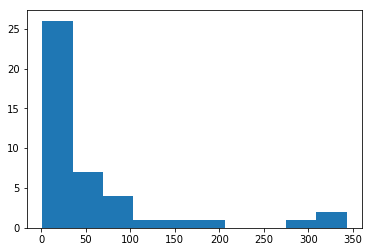

In [55]:
plt.hist(x=ngrams_df.loc[0:50,'count'], bins='auto')

In [127]:
df_inc = pd.read_csv('/Users/yujinglai/Dropbox/Eugenie/data/processed_reviewMeta/ngrams/incentive_text_combined.csv', index_col=0, low_memory=False)
df_non = pd.read_csv('/Users/yujinglai/Dropbox/Eugenie/data/processed_reviewMeta/ngrams/nonincentive_text_combined.csv', index_col=0, low_memory=False)

In [132]:
df_inc = df_inc.reset_index()
df_non = df_non.reset_index()

In [133]:
inc_text = pd.DataFrame(df_inc.loc[:,'ngrams'])
non_text = pd.DataFrame(df_non['ngrams'])

In [134]:
inc_text.head()

,ngrams
0,receive this product at a
1,i receive this product at
2,i receive this product at a
3,at a discount in exchange
4,for -PRON- honest and unbiased


In [135]:
inc_diff = pd.concat([inc_text, non_text, non_text]).drop_duplicates(keep=False)

In [138]:
inc_diff.head()

,ngrams
1,i receive this product at
2,i receive this product at a
27,i receive this product at a discount in exchange
28,i receive this product at a discount in
77,i receive this item at


In [139]:
merged_inc_diff = df_inc.merge(inc_diff, on='ngrams', how='inner')

In [140]:
merged_inc_diff.head()

,count,ngrams
0,286,i receive this product at
1,260,i receive this product at a
2,91,i receive this product at a discount in exchange
3,91,i receive this product at a discount in
4,48,i receive this item at


In [141]:
merged_inc_diff.to_csv('reviewMeta_incentive_text_ngrams.csv', index=False)

In [143]:
flag_text = list(merged_inc_diff['ngrams'])